In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.examples.tutorials.mnist.input_data as input_data
def train_and_test_data_mnist():

    db_path = 'C:\MyPython\20190410'  # TODO: you db path
    mnist = input_data.read_data_sets(db_path, one_hot=True)
    print('Training data size: ' + str(mnist.train.images.shape))
    print('Test data size: ' + str(mnist.test.images.shape))
    x_train = mnist.train.images # 55000x784
    y_train = mnist.train.labels # 55000x10
    x_test = mnist.test.images
    y_test = mnist.test.labels
    return x_train, y_train, x_test, y_test

def create_placeholders(x_shape, y_shape):
    x = tf.placeholder(tf.float32, shape=[None, x_shape]) # 784 for mnist
    y = tf.placeholder(tf.float32, shape=[None, y_shape]) # 10 for mnist
    return x, y

def init_parameters(n_chnls_img, n_chnls_conv1, n_chnls_conv2):

    w1 = tf.get_variable('w1', shape=[5, 5, n_chnls_img, n_chnls_conv1],
                         initializer=tf.contrib.layers.xavier_initializer(seed=0))
    w2 = tf.get_variable('w2', shape=[3, 3, n_chnls_conv1, n_chnls_conv2],
                         initializer=tf.contrib.layers.xavier_initializer(seed=0))
    params = {'w1': w1,
              'w2': w2}
    return params


def forward_propagation(x, params):
    x = tf.reshape(x, shape=[-1,28,28,1])   # reshape to 28x28. all at once
    w1 = params['w1']
    w2 = params['w2']

    conv1 = tf.nn.conv2d(x, w1, strides=[1,1,1,1], padding='SAME')
    relu1 = tf.nn.relu(conv1)
    pool1 = tf.nn.max_pool(relu1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

    conv2 = tf.nn.conv2d(pool1, w2, strides=[1,1,1,1], padding='SAME')
    relu2 = tf.nn.relu(conv2)
    pool2 = tf.nn.max_pool(relu2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    # flatten the pool2 to feed into the fully connected layer
    pool2 = tf.contrib.layers.flatten(pool2)

    fc1 = tf.contrib.layers.fully_connected(pool2, num_outputs=1024)
    fc1 = tf.nn.dropout(fc1, keep_prob=0.75)
    fc2 = tf.contrib.layers.fully_connected(fc1, num_outputs=10, activation_fn=None)
    return fc2


def compute_cost(fc_out, y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=fc_out, labels=y))
    return cost


def back_propagation(cost, learning_rate):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    return optimizer


def driver_function(x_train, y_train, x_test, y_test, hyper_parameters):
    # unpack the network hyper params
    learning_rate = hyper_parameters['learning_rate']
    n_epochs = hyper_parameters['n_epochs']
    batch_size = hyper_parameters['batch_size']
    display_step = hyper_parameters['display_step']
    n_chnls_img = hyper_parameters['n_chnls_img']
    n_chnls_conv1 = hyper_parameters['n_chnls_conv1']
    n_chnls_conv2 = hyper_parameters['n_chnls_conv2']

    tf.reset_default_graph()
    tf.set_random_seed(seed=1)
    m, x_shape = x_train.shape  # m is the total number of samples
    _, y_shape = y_train.shape
    x, y = create_placeholders(x_shape, y_shape)
    params = init_parameters(n_chnls_img, n_chnls_conv1, n_chnls_conv2)
    model = forward_propagation(x, params)
    cost = compute_cost(model, y)
    optimizer = back_propagation(cost, learning_rate)
    all_costs = []              # save errors from all epochs. to plot

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(n_epochs):
            num_batch = int(m / batch_size)
            count = 0
            batch_cost = 0
            for nb in range(num_batch):
                train_data = x_train[count:count+batch_size]
                train_lebels = y_train[count:count+batch_size]
                _, tmp_cost = sess.run([optimizer, cost],
                                       feed_dict={x:train_data, y:train_lebels})
                batch_cost += tmp_cost
                count += batch_size
            all_costs.append(batch_cost/num_batch)

            if epoch % display_step == 0:
                print('epoch %d:,  minibatch loss: %f' %(epoch, batch_cost/num_batch))
        print('optimization done ...')

        # evaluate the model now on the Test Set. images network have not seen so far
        correct_pred = tf.equal(tf.arg_max(model, 1), tf.arg_max(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        train_accuracy = accuracy.eval({x: x_train, y:y_train})
        test_accuracy = accuracy.eval({x: x_test, y: y_test})

    return train_accuracy, test_accuracy, params, all_costs

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\MyPython90410\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\MyPython90410\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting C:\MyPython90410\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting C:\MyPython90410\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as 

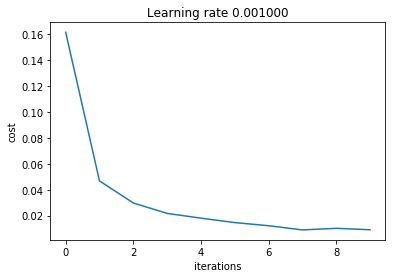

In [2]:
learning_rate = 0.001
n_epochs = 10         # total number of iterations of training
batch_size = 100      # or min-batch size
display_step = 1      # show prediction errors after each of this many steps

n_chnls_img = 1       # mnist images are one channel. 3 for rgb images
n_chnls_conv1 = 32    # just a choice
n_chnls_conv2 = 64

# pack them in a dictionary. sending too many function argument looks clutter
hyper_parameters = {'learning_rate': learning_rate, 'n_epochs': n_epochs,
                        'batch_size': batch_size, 'display_step': display_step,
                        'n_chnls_img': n_chnls_img, 'n_chnls_conv1': n_chnls_conv1,
                        'n_chnls_conv2': n_chnls_conv2}

x_train, y_train, x_test, y_test = train_and_test_data_mnist()
#plt.imshow(x_train[2018, :].reshape((28, 28)), cmap='gray') # look at an image
train_acc, test_acc, _, all_costs = driver_function(x_train, y_train,
                                                        x_test, y_test,
                                                        hyper_parameters)
# show the training errors
plt.plot(np.squeeze(all_costs))
plt.xlabel('iterations');plt.ylabel('cost')
plt.title('Learning rate %f' %learning_rate)
plt.show()

#print('Train accuray: %f' %train_acc)
#print('Test accuracy: %f' %test_acc)

In [3]:
print('Train accuracy : %f' %train_acc)     # Train accuracy : 0.996636
print('Test accuracy : %f' %test_acc)       # Test accuracy : 0.989900

Train accuracy : 0.996636
Test accuracy : 0.989900
